In [ ]:
from azureml.core import Experiment, Run, Workspace
import azureml.core

# Check core SDK version number
print("SDK version:", azureml.core.VERSION)

In [ ]:
subscription_id = '6a0ec27b-11111-1111-1111-8c3003d5e4bc'
resource_group  = 'PythonSDK'
workspace_name  = 'pythonsdkworkspace'

try:
    ws = Workspace(subscription_id = subscription_id, resource_group = resource_group, workspace_name = workspace_name)
    ws.write_config()
    print('Library configuration succeeded')
except:
    print('Workspace not found')


In [ ]:
experiment_name = 'IrisPred5'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

irisds = load_iris()

iris = sns.load_dataset("iris")
print(iris.head())

In [ ]:
iris.describe()

#### Split the data into testing and training - stratify so we get an even split

# 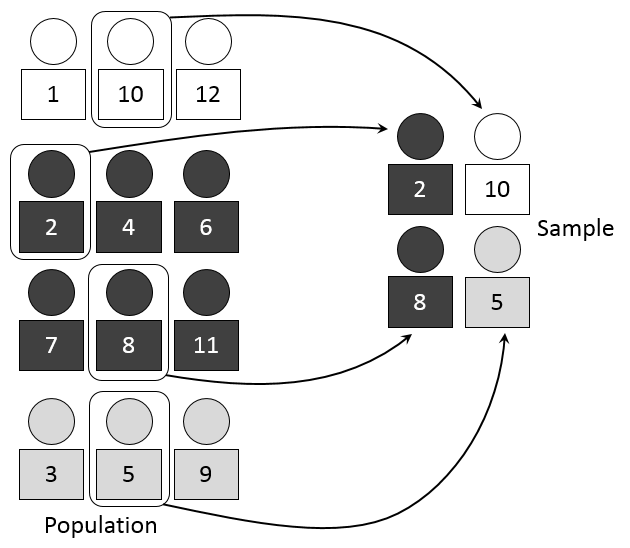

In [ ]:
#Split the data int a label and the features
y = iris.species #Label
X = iris.drop('species',axis=1) #Features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, #Split 70-30
                                                    random_state=100, 
                                                    stratify=y) #Stratify by the species to make sure we have a fair sampling

In [ ]:
#Make sure we have a 70/30 split
print("Training = ", y_train.count(), "Testing = ", y_test.count())

In [ ]:
#Show our data
sns.set(style="ticks")
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species",palette="bright")
plt.show()

# 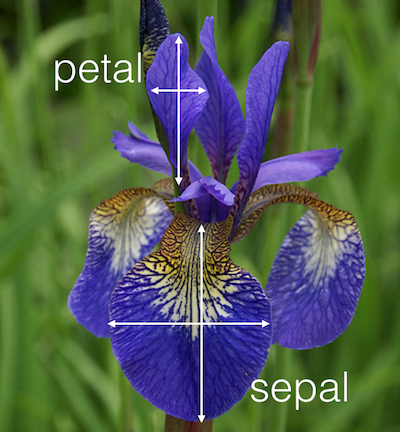

In [ ]:
sns.set(style="ticks")
iris = sns.load_dataset("iris")
irispl = iris.loc[ : , ['petal_length', 'petal_width', 'species'] ]
irispl.species = pd.factorize(irispl.species)[0]
irispl.plot.scatter(x='petal_length', y='petal_width', c='species', cmap='gist_rainbow', title="Petal")

irisse = iris.loc[ : , ['sepal_length', 'sepal_width', 'species'] ]
irisse.species = pd.factorize(irisse.species)[0]
irisse.plot.scatter(x='sepal_length', y='sepal_width', c='species', cmap='gist_rainbow', title="Sepal")


plt.show()

In [ ]:
#Create an experiment
experiment = Experiment(workspace=ws, name=experiment_name)
#Begin logging
run = experiment.start_logging()

##Tag in Azure
run.tag("Description","Run no 1")
run.log('max_depth', 1)

#Run the training
clf = tree.DecisionTreeClassifier(max_depth=1, criterion="gini", random_state=1)
clf.fit(X_train,y_train)
#Predict with test data
y_pred = (clf.predict(X_test))

#Record Accuracy etc
run.log('Accuracy', (accuracy_score(y_test, y_pred)* 100))

#Dump to disk
joblib.dump(value=clf, filename='modelTree1.pkl')
#Upload model to Azure
run.upload_file(name='outputs/modelTree1.pkl', path_or_stream='./modelTree1.pkl')

cm = confusion_matrix(y_test, y_pred)
print(cm)

#Save the confusion Matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
run.log_image("Tree", path=None, plot=plt)
run.log_list('Fake Data', [0,0,1,1,2,3,5,8,13])

print('Accuracy Score');
print(accuracy_score(y_test, y_pred)* 100);

run.complete()



In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
from azureml.widgets import RunDetails
RunDetails(run).show()

In [ ]:
experiment = Experiment(workspace=ws, name=experiment_name)
run = experiment.start_logging()

##Tag in Azure
run.tag("Description","Run no 2")
run.log('max_depth', 2)

#Run the training
clf = tree.DecisionTreeClassifier(max_depth=2, criterion="gini", random_state=1)
clf.fit(X_train,y_train)
#PRedict with test data
y_pred = (clf.predict(X_test))

#Record Accuracy etc
run.log('Accuracy', (accuracy_score(y_test, y_pred)* 100))

#Upload model
joblib.dump(value=clf, filename='modelTree2.pkl')
run.upload_file(name='outputs/modelTree2.pkl', path_or_stream='./modelTree2.pkl')

cm = confusion_matrix(y_test, y_pred)
print(cm)

#Save the confusion Matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
#plt.show()
run.log_image("Tree", path=None, plot=plt)

run.log_list('Fake Data', [0,0,1,1,2,3,5,8,13])

run.complete()

print ('Accuracy Score');
print (accuracy_score(y_test, y_pred)* 100);

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
experiment = Experiment(workspace=ws, name=experiment_name)
run = experiment.start_logging()

##Tag in Azure
run.tag("Description","Run no 3")
run.log('max_depth', 7)

#Run the training
clf = tree.DecisionTreeClassifier(max_depth=7, criterion="gini", random_state=1)
clf.fit(X_train,y_train)
#PRedict with test data
y_pred = (clf.predict(X_test))

#Record Accuracy etc
run.log('Accuracy', (accuracy_score(y_test, y_pred)* 100))

#Upload model
joblib.dump(value=clf, filename='modelTree3.pkl')
run.upload_file(name='outputs/modelTree3.pkl', path_or_stream='./modelTree3.pkl')

cm = confusion_matrix(y_test, y_pred)
print(cm)

#Save the confusion Matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
run.log_image("Tree", path=None, plot=plt)
run.log_list('Fake Data', [0,0,1,1,2,3,5,8,13])

run.complete()

print ('Accuracy Score');
print (accuracy_score(y_test, y_pred)* 100);

In [ ]:
#We can write our own single level tree that does a better job
def iriscustompred(sepal_length, sepal_width, petal_length, petal_width):
    if petal_length + petal_width < 3:
        return('setosa')
    else:
        if petal_length + petal_width < 7:
            return('versicolor')
        else: 
            return('virginica')
        
idemopred = iris

idemopred['pred'] = np.vectorize(iriscustompred)(idemopred['sepal_length'], idemopred['sepal_width'], idemopred['petal_length'], idemopred['petal_width'])
wrongPredictionCount = sum(abs(idemopred['pred']!=idemopred['species']))
#print(idemopred)

print("Number of Wrong Predictions : " + str(wrongPredictionCount))


In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


In [ ]:
run

In [ ]:
#Return all runs
from tqdm import tqdm
runs = {}
run_metrics = {}
runsorder = {}
i = 0

for r in tqdm(experiment.get_runs()):
    metrics = r.get_metrics()
    if 'Accuracy' in metrics.keys():
        i = i + 1
        runs[r.id] = r
        run_metrics[r.id] = metrics

In [ ]:
#Get the best accuracy
best_run_id = max(run_metrics, key = lambda k: run_metrics[k]['Accuracy'])
best_run = runs[best_run_id]
print('Best run is:', best_run_id)
print('Metrics:', run_metrics[best_run_id])

In [ ]:
#Get the flies associated with the best run
for f in best_run.get_file_names():
    print(f)

In [ ]:
#Make sure this si the model filename not the image filename
best_run.get_file_names()[1]

In [ ]:
#Register the model with AzureML ACI service.
model = best_run.register_model(model_name='best_model_iris_tree', model_path=best_run.get_file_names()[1])

In [ ]:
#List all registered models
from azureml.core.model import Model
models = Model.list(workspace=ws, name='best_model_iris_tree')
for m in models:
    print(m.name, m.version)

In [ ]:
with open('scoreTree.py', 'w') as the_file:
  the_file.write('''import pickle 
import json
import numpy as np
from sklearn.externals import joblib
#from sklearn.linear_model import Ridge
from sklearn import tree
from azureml.core.model import Model


def init():
    global model
    # note here "best_model" is the name of the model registered under the workspace
    # this call should return the path to the model.pkl file on the local disk.
    model_path = Model.get_model_path(model_name='best_model_iris_tree')
    # deserialize the model file back into a sklearn model
    model = joblib.load(model_path)


# note you can pass in multiple rows for scoring
def run(raw_data):
    try:
        data = json.loads(raw_data)['data']
        data = np.array(data)
        result = model.predict(data)
        return json.dumps({"result": result.tolist()})
    except Exception as e:
        result = str(e)
        return json.dumps({"error": result})
''')

In [ ]:
with open('./scoreTree.py', 'r') as scoring_script:
    print(scoring_script.read())

# 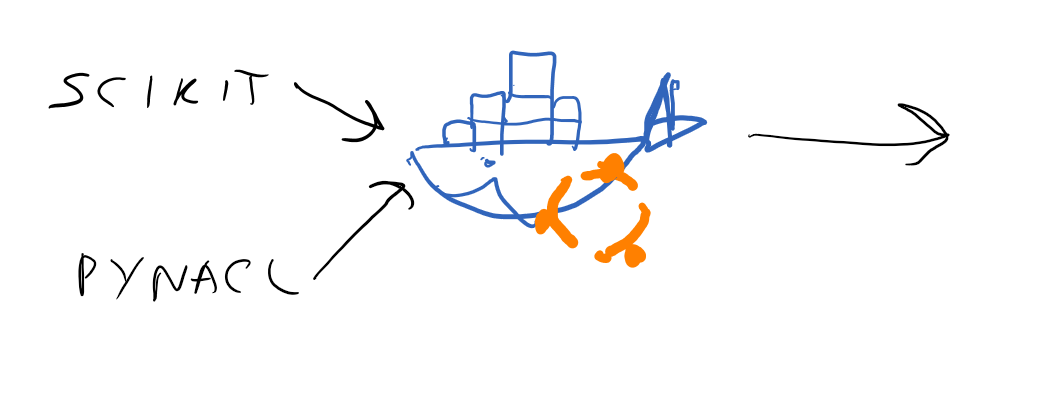

In [ ]:
#We need a environment dependency file myenv.yml to specify which 
#libraries are needed by the scoring script when building the Docker image
from azureml.core.conda_dependencies import CondaDependencies 

myenv = CondaDependencies()
myenv.add_conda_package("scikit-learn")
myenv.add_pip_package("pynacl==1.2.1")
print(myenv.serialize_to_string())

with open("myenvtree.yml","w") as f:
    f.write(myenv.serialize_to_string())

In [ ]:
#Deploy web service into an Azure Container Instance
from azureml.core.webservice import AciWebservice, Webservice, AksWebservice

aciconfig = AciWebservice.deploy_configuration(cpu_cores=1, 
                                               memory_gb=1,
                                               tags={'sample name': 'TreeTest'}, 
                                               description='Tree Test Deploy.')

#aksconfig = AksWebservice.deploy_configuration(cpu_cores=1, 
#                                               memory_gb=1,
#                                               tags={'sample name': 'TreeTest'}, 
#                                               description='Tree Test Deploy.')

In [ ]:
from azureml.core.image import ContainerImage, Image
image_config = ContainerImage.image_configuration(execution_script="scoreTree.py", 
                                    runtime="python", 
                                     conda_file="myenvtree.yml")

# create the image
#image = Image.create(name='myimg', models=[model], image_config=image_config, workspace=ws)

# wait for image creation to finish
#image.wait_for_creation(show_output=True)


In [ ]:
%%time
# this will take 5-10 minutes to finish
# you can also use "az container list" command to find the ACI being deployed

#aks_service = Webservice.deploy_from_image(deployment_config=aciconfig, 
#                                           image=image, 
#                                           name='iristree-svc', 
#                                           workspace=ws)

#aks_service.wait_for_deployment(show_output=True)

service = Webservice.deploy_from_model(name='iristreesvca',
                                       deployment_config=aciconfig,
                                       models=[model],
                                       image_config=image_config,
                                       workspace=ws)

#service.wait_for_deployment(show_output=True)

In [ ]:
print(service.get_logs())

In [ ]:
service.wait_for_deployment(show_output=True)

In [ ]:
#Test web service
print('web service is hosted in', service.compute_type, ':', service.scoring_uri)

In [ ]:
#Test the webservice
import requests
import json

# 2 rows of input data, each with 10 made-up numerical features
input_data = "{\"data\": [[1, 2, 3, 4], [1, 1, 1, 1]]}"

headers = {'Content-Type':'application/json'}
resp = requests.post(service.scoring_uri, input_data, headers = headers)

print(resp.text)

In [ ]:
%%time
#Delete the compute
service.delete()

# Hyper Parameter Tuning

# 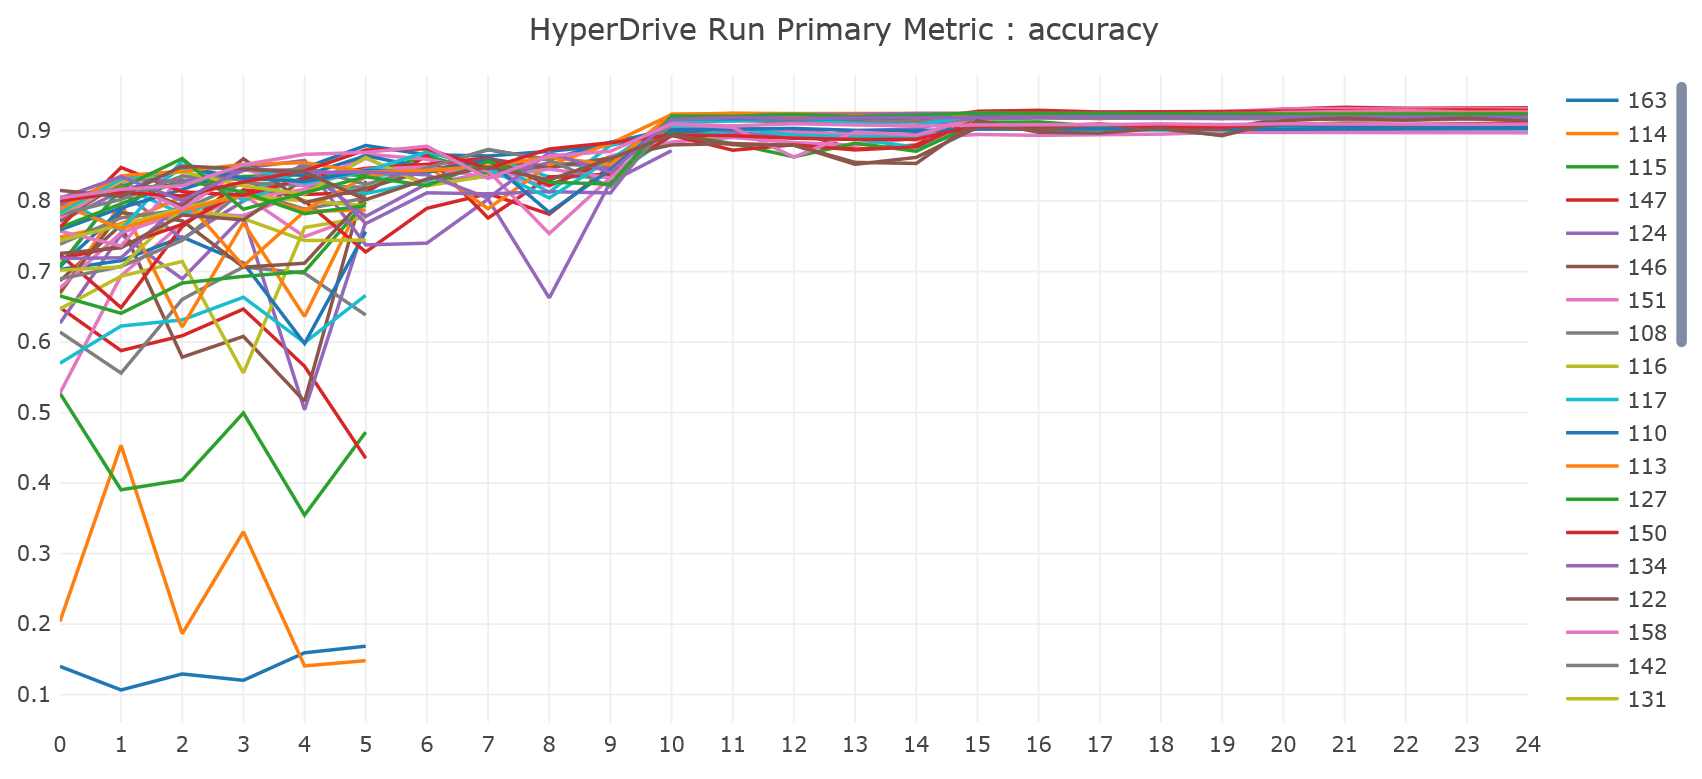